# Example extracted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html#example-cluster-plot-kmeans-stability-low-dim-dense-py

Referencia:
http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf

**First, we import all the packages we are going to need**

In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.utils import shuffle
from sklearn.utils import check_random_state
from sklearn.cluster import KMeans


In [10]:
random_state = np.random.RandomState(0)

In [11]:
n_runs = 5
n_init_range = np.array([1, 5, 10, 15, 20])

**Now we are going to generate the data for the example**

In [12]:
n_samples_per_center = 100
grid_size = 3
scale = 0.1
n_clusters = grid_size ** 2

**The following function just generate de data to be clustered. Fist, the centers are select as all the pairs  $(i,j)$ for $0<i,j<2$. Second, noise is added to such centers to generate the "real" data.**

In [13]:
def make_data(random_state, n_samples_per_center, grid_size, scale):
    random_state = check_random_state(random_state)
    centers = np.array([[i, j]
                        for i in range(grid_size)
                        for j in range(grid_size)])
    n_clusters_true, n_features = centers.shape

    noise = random_state.normal(
        scale=scale, size=(n_samples_per_center, centers.shape[1]))
    

    X = np.concatenate([c + noise for c in centers])
    y = np.concatenate([[i] * n_samples_per_center
                        for i in range(n_clusters_true)])
    
    return shuffle(X, y, random_state=random_state)

In [14]:
plots = []
legends = []

cases = [
    (KMeans, 'k-means++'),
    (KMeans, 'random'),
]

Evaluation of KMeans with k-means++ init
Evaluation of KMeans with random init


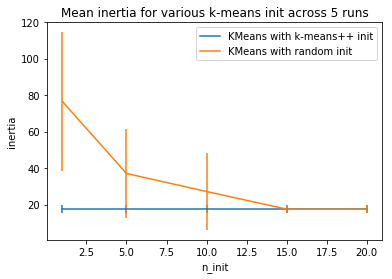

In [15]:
for factory, init in cases:
    print("Evaluation of %s with %s init" % (factory.__name__, init))
    inertia = np.empty((len(n_init_range), n_runs))

    for run_id in range(n_runs):
        X, y = make_data(run_id, n_samples_per_center, grid_size, scale)
        for i, n_init in enumerate(n_init_range):
            km = factory(n_clusters=n_clusters, init=init, random_state=run_id,
                         n_init=n_init).fit(X)
            inertia[i, run_id] = km.inertia_
    p = plt.errorbar(n_init_range, inertia.mean(axis=1), inertia.std(axis=1))
    plots.append(p[0])
    legends.append("%s with %s init" % (factory.__name__, init))
    plt.xlabel('n_init')
    plt.ylabel('inertia')
    plt.legend(plots, legends)
    plt.title("Mean inertia for various k-means init across %d runs" % n_runs)

**where the inertia, or within-cluster sum of squared criterion is given by**
$$
    \sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)
$$ 
